## Individual household electric power consumption


### Additional Information

###### 1.date: Date in format dd/mm/yyyy
###### 2.time: time in format hh:mm:ss
###### 3.global_active_power: household global minute-averaged active power (in kilowatt)
###### 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
###### 5.voltage: minute-averaged voltage (in volt)
###### 6.global_intensity: household global minute-averaged current intensity (in ampere)
###### 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
###### 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
###### 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [421]:
import pandas as pd 
import numpy as np
HEP_dataset = pd.read_csv('/home/petr/Desktop/deep_ex/household_power_consumption.txt'
            , delimiter=';')


/home/petr/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [422]:
HEP_dataset = HEP_dataset[:10000]

In [423]:
HEP_dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
9995,23/12/2006,15:59:00,4.958,0.664,241.340,20.600,0.000,0.000,17.0
9996,23/12/2006,16:00:00,4.954,0.666,241.500,20.600,0.000,0.000,18.0
9997,23/12/2006,16:01:00,4.932,0.658,240.800,20.600,0.000,0.000,18.0
9998,23/12/2006,16:02:00,4.926,0.660,240.770,20.600,0.000,0.000,18.0


In [424]:
import datetime

In [425]:
# HEP_dataset1 = [datetime.time(hour= int(v.split(':')[0]), minute=int(v.split(':')[1]), second=int(v.split(':')[2])) for v in HEP_dataset['Time']]

In [426]:
HEP_dataset = HEP_dataset[pd.to_numeric(HEP_dataset['Global_reactive_power'], errors='coerce').notnull()]
# HEP_dataset1 = (HEP_dataset['Date'] + ' ' + HEP_dataset['Time']).astype('datetime64[ns]')

In [427]:
HEP_time = [float(v.split(":")[0] + '.' + v.split(":")[1]) for v in HEP_dataset['Time']]

In [428]:
type(HEP_time)

list

In [429]:
# HEP_voltage = HEP_dataset['Voltage'].to_list()

# HEP_dataset = pd.DataFrame({'voltage':HEP_voltage,
#               'time':HEP_time})


In [430]:
# HEP_dataset = HEP_dataset.sort_values('time')

In [431]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

HEP_y = np.array([float(i) for i in HEP_dataset['Voltage']])
HEP_X = np.array([float(i) for i in HEP_dataset1])
HEP_X = np.reshape(HEP_X, (-1, 1))


In [432]:
HEP_X

array([[17.24],
       [17.25],
       [17.26],
       ...,
       [16.01],
       [16.02],
       [16.03]])

In [433]:
HEP_y

array([234.84, 233.63, 233.29, ..., 240.8 , 240.77, 240.81])

Coefficients: 
 [-0.75287867]
Mean squared error: 0.50
Coefficient of determination: -0.19


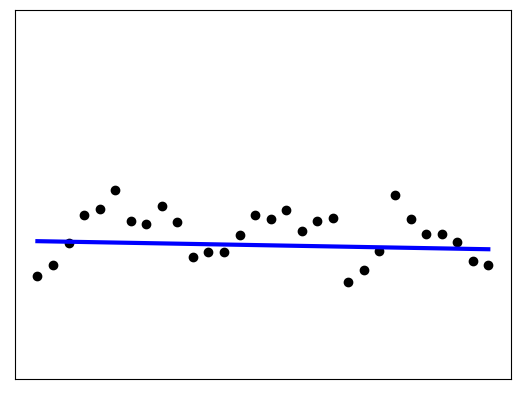

In [458]:

# HEP_X = HEP_X[:, np.newaxis, 2]

# Use only one feature

# Split the data into training/testing sets
HEP_X_train = HEP_X[:100]
HEP_X_test = HEP_X[100:130]
HEP_X_test
# Split the targets into training/testing sets
HEP_y_train = HEP_y[:100]
HEP_y_test = HEP_y[100:130]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(HEP_X_train, HEP_y_train)

# Make predictions using the testing set
HEP_y_pred = regr.predict(HEP_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(HEP_y_test, HEP_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(HEP_y_test, HEP_y_pred))

# Plot outputs
plt.scatter(HEP_X_test, HEP_y_test, color="black")
plt.plot(HEP_X_test, HEP_y_pred, color="blue", linewidth=3)
# plt.xlim((-10, 30))                                                                                                            
plt.ylim((230, 240))
plt.xticks(())
plt.yticks(())

plt.show()


##### *** Active power is useful power that does some real work in an AC circuit, whereas reactive power is non-useful power that flows back and forth

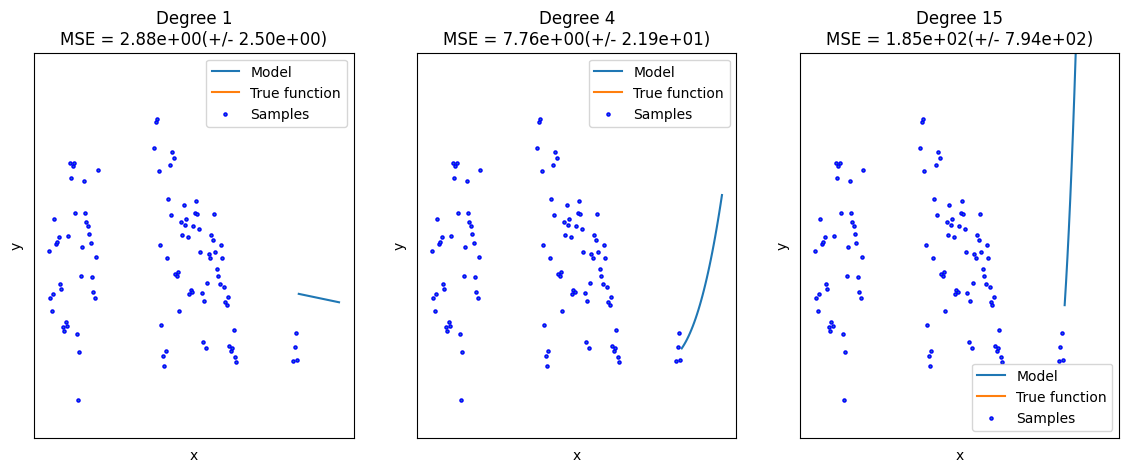

In [464]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 20
degrees = [1, 4, 15]

# X = np.sort(np.random.rand(n_samples))
# y = true_fun(HEP_X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(HEP_X_train, HEP_y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, HEP_X_train, HEP_y_train, scoring="neg_mean_squared_error", cv=20
    )

    plt.plot(HEP_X_test, pipeline.predict(HEP_X_test), label="Model")
    plt.plot(HEP_X_test, true_fun(HEP_X_test), label="True function")
    plt.scatter(HEP_X_train, HEP_y_train, edgecolor="b", s=5, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    # plt.xlim((-10, 30))                                                                                                            
    plt.ylim((230, 240))    
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )           
plt.show()

In [436]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([0.5, 0.5])